In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
# Read the CSV
airplane_df = pd.read_csv("../data/airplane_df.csv", encoding = "latin-1", low_memory = False)

In [4]:
# United States (and its territories) only
airplane_df = airplane_df[airplane_df["Country"] == "United States"]

Analyzing Airplane Damage

In [5]:
# Airplane Damage
airplane_df["Aircraft.damage"].value_counts()

Aircraft.damage
Substantial    20523
Destroyed       2673
Minor            508
Unknown           43
Name: count, dtype: int64

In [6]:
# Drop null values in Aircraft.damage column
airplane_df.dropna(subset=["Aircraft.damage"], inplace = True)

In [7]:
unknown_aircraft_damage = airplane_df[airplane_df["Aircraft.damage"] == "Unknown"]
unknown_aircraft_damage.sort_values("Total.Uninjured", ascending=False)
unknown_aircraft_damage

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
26156,20210216102635,Accident,CEN21LA129,2021-02-05,"LARNED, KS",United States,381050N,0099555W,LQR,Pawnee County Airport,Non-Fatal,Unknown,Airplane,N115FP,COLUMBIA AIRCRAFT MFG,LC42-550FG,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,NaN,08-03-2021,KS
26204,20210225102676,Accident,CEN21LA138,2021-02-24,"MILLVILLE, IA",United States,042420N,0091427E,NaN,NaN,Non-Fatal,Unknown,Airplane,N3209U,CESSNA,182F,No,1.0,NaN,091,NSCH,Personal,Pilot,0.0,2.0,0.0,0.0,VMC,NaN,NaN,22-03-2021,IA
26273,20210324102802,Accident,CEN21LA163,2021-03-14,"PORT ARANSAS, TX",United States,274911N,0097533W,RAS,MUSTANG BEACH,Non-Fatal,Unknown,Airplane,N6074A,PIPER,PA 46-350P,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,The pilotÂs failure to maintain proper airspe...,20-08-2021,TX
26279,20210323102798,Accident,CEN21LA161,2021-03-15,"DUMAS, AR",United States,335232N,0912033W,NaN,NaN,Non-Fatal,Unknown,Airplane,N119KP,AIR TRACTOR INC,AT-602,No,1.0,NaN,137,NSCH,Aerial Application,K & P FLYING SERVICES INC,0.0,0.0,0.0,2.0,VMC,NaN,NaN,23-04-2021,AR
26560,20210601103181,Accident,CEN21LA244,2021-05-22,"OAK ISLAND, MN",United States,491853N,0945126W,NaN,NaN,Non-Fatal,Unknown,Airplane,N218RD,DEHAVILLAND,DHC-2 MK.I,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,1.0,2.0,VMC,NaN,NaN,07-06-2021,MN
26705,20210622103316,Accident,WPR21LA237,2021-06-21,"WARREN, ID",United States,045165N,0115411W,3U1,WARREN /USFS/,Non-Fatal,Unknown,Airplane,N2087F,CESSNA,182P,No,1.0,NaN,091,NaN,Personal,H & M LTD,0.0,0.0,2.0,0.0,VMC,NaN,NaN,07-07-2021,ID
26720,20210701103394,Accident,CEN21LA298,2021-06-25,"JENNINGS, LA",United States,301442N,0923954W,3R7,Jennings Muni,Non-Fatal,Unknown,Airplane,N9038N,AERO COMMANDER,500 S,No,2.0,Reciprocating,091,NaN,Executive/corporate,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilotÂs failure to extend the landing gea...,NaN,NaN
26761,20210706103429,Accident,CEN21LA308,2021-07-01,"TYLER, TX",United States,032210N,0095180W,NaN,Private,Non-Fatal,Unknown,Airplane,N42084,CESSNA,180J,No,1.0,Reciprocating,091,NaN,Personal,WILLIAMSON RUSSELL L,0.0,0.0,0.0,1.0,VMC,NaN,The pilotÂs failure to maintain proper airspe...,17-12-2021,TX
26773,20210715103484,Accident,CEN21LA321,2021-07-03,"CHARLEVOIX, MI",United States,452319N,0851914W,NaN,NaN,Non-Fatal,Unknown,Airplane,N8UU,SWANN LYNN J,SEAWIND 3000,Yes,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The loss of engine power for undetermined reas...,NaN,NaN
26858,20210723103526,Accident,ERA21LA296,2021-07-21,"READING, PA",United States,402243N,0755755W,RDG,READING RGNL/CARL A SPAATZ FLD,Non-Fatal,Unknown,Airplane,N46CF,CESSNA,560XL,No,2.0,NaN,091,NSCH,Executive/corporate,PV TRANSPORT INC,0.0,0.0,0.0,6.0,VMC,NaN,NaN,NaN,PA


In [8]:
# Drop Aircraft Damage with the Unknown value
airplane_df = airplane_df.drop(airplane_df[airplane_df["Aircraft.damage"] == "Unknown"].index)

Analyzing Boeing Makes

In [9]:
# Analyzing Boeing
airplane_df = airplane_df[airplane_df["Make"] == "BOEING"]

In [10]:
# Drop airplanes with null values
airplane_df.dropna(subset=["Number.of.Engines"], inplace = True)

From our data prior to selecting Boeing and focusing on commercial airplanes only, I dropped airplanes with 1.0 Engines as commercial jets have 2.0 Engines or more. I also dropped models that I noticed were either not commerical (fighter jets, for example) or retired for passengers, such as the MD-10-10F.

In [11]:
# Drop airplanes with 1.0 Engine
airplane_df = airplane_df.drop(airplane_df[airplane_df["Number.of.Engines"] == 1.0].index)

In [12]:
# Drop airplanes are that are not commercial, retired
airplane_df = airplane_df.drop(airplane_df[airplane_df.Model.isin(["KC-135A", "MD-10-10F", "MD-11F", "MD", "B-17G", "B17"])].index)

Analyzing Injuries

In [13]:
airplane_df.update(airplane_df[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]].fillna(0))

In [14]:
# Add Non-Fatal column
non_fatal = airplane_df["Total.Serious.Injuries"] + airplane_df["Total.Minor.Injuries"] + airplane_df["Total.Uninjured"]
airplane_df.insert(27, "Total.Non-Fatal", non_fatal)

In [15]:
# Add Total.People column
total_people = airplane_df["Total.Fatal.Injuries"] + airplane_df["Total.Serious.Injuries"] + airplane_df["Total.Minor.Injuries"] + airplane_df["Total.Uninjured"]
airplane_df.insert(28, "Total.People", total_people)

Cleaning Model names for smoother analyzing in comparing them

In [16]:
# 707
models_707 = list(airplane_df["Model"][airplane_df["Model"].str.contains("707")].value_counts().keys())
dict_707 = {key: "707" for key in models_707}
airplane_df["Model"] = airplane_df["Model"].replace(dict_707)

In [17]:
# 727
models_727 = list(airplane_df["Model"][airplane_df["Model"].str.contains("727")].value_counts().keys())
dict_727 = {key: "737" for key in models_727}
airplane_df["Model"] = airplane_df["Model"].replace(dict_727)

In [18]:
# 737
models_737 = list(airplane_df["Model"][airplane_df["Model"].str.contains("737")].value_counts().keys())
dict_737 = {key: "737" for key in models_737}
airplane_df["Model"] = airplane_df["Model"].replace(dict_737)

In [19]:
# 747
models_747 = list(airplane_df["Model"][airplane_df["Model"].str.contains("747")].value_counts().keys())
dict_747 = {key: "747" for key in models_747}
airplane_df["Model"] = airplane_df["Model"].replace(dict_747)

In [20]:
# 757
models_757 = list(airplane_df["Model"][airplane_df["Model"].str.contains("757")].value_counts().keys())
dict_757 = {key: "757" for key in models_757}
airplane_df["Model"] = airplane_df["Model"].replace(dict_757)

In [21]:
# 767
models_767 = list(airplane_df["Model"][airplane_df["Model"].str.contains("767")].value_counts().keys())
dict_767 = {key: "767" for key in models_767}
airplane_df["Model"] = airplane_df["Model"].replace(dict_767)

In [22]:
# 777
models_777 = list(airplane_df["Model"][airplane_df["Model"].str.contains("777")].value_counts().keys())
dict_777 = {key: "777" for key in models_777}
airplane_df["Model"] = airplane_df["Model"].replace(dict_777)

In [23]:
airplane_df["Model"].value_counts()

Model
737          79
757          23
767          16
747          15
777           9
707           3
DC-10         1
DHC-8-102     1
717-200       1
Name: count, dtype: int64

Visualization

Text(0.5, 1.0, 'Total Fatal Injuries vs. Total Non-Fatal Injuries')

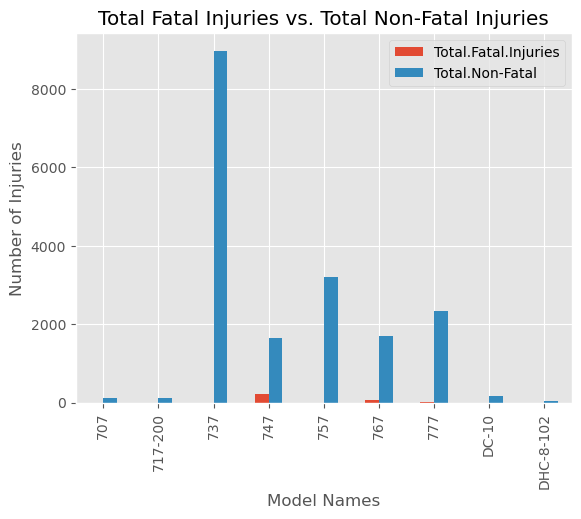

In [24]:
plt.style.use("ggplot")
airplane_df[["Model", "Total.Fatal.Injuries", "Total.Non-Fatal"]].groupby("Model").sum().plot(kind = "bar")
plt.xlabel("Model Names")
plt.ylabel("Number of Injuries")
plt.title("Total Fatal Injuries vs. Total Non-Fatal Injuries")

Did another look at the data after January 1998 in regards to formation of the Commercial Aviation Safety Team (CAST) in the US to confirm 737's standing.

In [25]:
airplane_df["Event.Date"] = pd.to_datetime(airplane_df["Event.Date"])
airplane_df = airplane_df[airplane_df["Event.Date"] > "1998-01-01"]
airplane_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Non-Fatal,Total.People,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,State
3462,20001212X20606,Accident,DCA00MA030,2000-03-05,"BURBANK, CA",United States,NaN,NaN,BUR,BURBANK-GLENDALE-PASADENA,Non-Fatal,Destroyed,Airplane,N668SW,BOEING,737,No,2.0,Turbo Fan,Part 121: Air Carrier,SCHD,Unknown,Southwest Airlines Co,0.0,2.0,42.0,98.0,142.0,142.0,VMC,Landing,Probable Cause,14-02-2018,CA
3514,20010226X00510,Accident,NYC01LA075A,2001-02-03,"BOSTON, MA",United States,NaN,NaN,BOS,Logan International Airport,Non-Fatal,Substantial,Airplane,N3735D,BOEING,737,No,2.0,Turbo Fan,Part 121: Air Carrier,SCHD,NaN,NaN,0.0,0.0,0.0,135.0,135.0,135.0,VMC,Taxi,Probable Cause,14-02-2018,MA
3568,20020123X00104,Accident,DCA01MA063,2001-09-11,"NEW YORK CITY, NY",United States,NaN,NaN,NaN,NaN,Fatal(65),Destroyed,Airplane,N612UA,BOEING,767,No,2.0,Turbo Fan,Part 121: Air Carrier,SCHD,NaN,United Airlines,65.0,0.0,0.0,0.0,0.0,65.0,NaN,Cruise,Probable Cause,08-12-2009,NY
3799,20031105X01861,Accident,NYC04CA003,2003-10-04,"BOSTON, MA",United States,42.364167,-71.005,BOS,Boston,Non-Fatal,Substantial,Airplane,N972AN,BOEING,737,No,2.0,Turbo Fan,Part 121: Air Carrier,SCHD,NaN,NaN,0.0,0.0,0.0,76.0,76.0,76.0,VMC,Standing,Probable Cause,05-02-2004,MA
4399,20050323X00356,Accident,NYC05FA054,2005-03-02,"NEWARK, NJ",United States,40.698611,-74.17,EWR,Newark International Airport,Non-Fatal,Substantial,Airplane,N78008,BOEING,777,No,2.0,Turbo Fan,Part 121: Air Carrier,SCHD,NaN,Continental Airlines Inc,0.0,0.0,0.0,214.0,214.0,214.0,VMC,Takeoff,Probable Cause,03-05-2012,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27184,20211001104015,Accident,DCA22LA002,2021-09-27,"NEWARK, NJ",United States,404133N,0074107W,KEWR,Newark Liberty International A,Non-Fatal,Substantial,Airplane,N12125,BOEING,757,No,2.0,NaN,121,SCHD,NaN,United Airlines,0.0,0.0,0.0,172.0,172.0,172.0,NaN,NaN,NaN,NaN,NJ
27384,20211206104355,Accident,DCA22LA038,2021-11-29,"MIAMI, FL",United States,252812N,0801012W,NaN,NaN,Non-Fatal,Substantial,Airplane,N705CK,BOEING,747,No,4.0,NaN,121,NSCH,NaN,KALITTA AIR LLC,0.0,0.0,0.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,FL
27516,20220204104596,Incident,ENG22FA009,2022-02-04,"LAS VEGAS, NV",United States,036435N,0115831W,LAS,Harry Reid International Airpo,Non-Fatal,Minor,Airplane,N817SY,BOEING,737,No,2.0,NaN,121,SCHD,NaN,"Sun Country Airlines, Inc.",0.0,0.0,0.0,56.0,56.0,56.0,VMC,NaN,NaN,09-03-2022,NV
27542,20220217104662,Incident,ENG22WA013,2022-02-10,"LANSERIA, OF",United States,026647S,0028046E,NaN,NaN,Non-Fatal,Minor,Airplane,ZS-ZWD,BOEING,737,No,2.0,NaN,NUSC,SCHD,NaN,Kulula,0.0,0.0,0.0,163.0,163.0,163.0,NaN,NaN,NaN,04-03-2022,OF


Text(0.5, 1.0, 'Total Fatal Injuries vs. Total Non-Fatal Injuries')

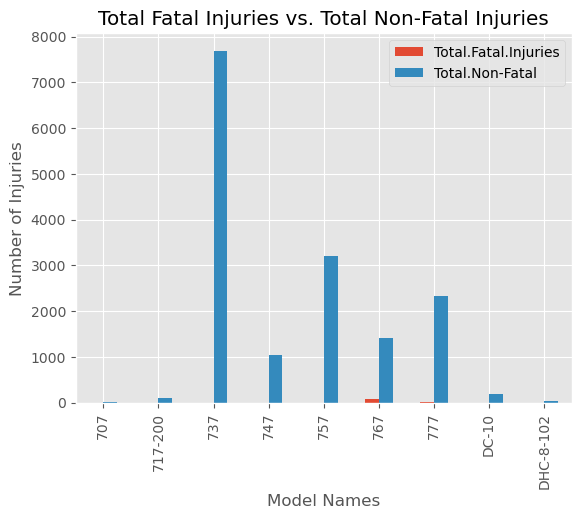

In [26]:
plt.style.use("ggplot")
airplane_df[["Model", "Total.Fatal.Injuries", "Total.Non-Fatal"]].groupby("Model").sum().plot(kind = "bar")
plt.xlabel("Model Names")
plt.ylabel("Number of Injuries")
plt.title("Total Fatal Injuries vs. Total Non-Fatal Injuries")

Conclusion: The Boeing 737 model is the safest airplane in this make's fleet.

In [ ]:
# Export to CSV for Tableau
boeing_df = airplane_df
boeing_df.to_csv("../data/boeing.csv")